In [115]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pymc as pm
import scipy.stats as sps
sns.set()

In [116]:
# days with k homicides in UK
zeros = np.array([0] * 259)
ones = np.array([1] * 387)
twos = np.array([2] * 261)
threes = np.array([3] * 131)
fours = np.array([4] * 40)
fives = np.array([5] * 13)
six = np.array([6] * 3)

data = np.concatenate([zeros,ones,twos,threes,fours,fives,six])


In [117]:
data_mean = data.mean()
data_std = data.std()
print (data_mean)
print (data_std)

1.4122486288848264
1.171366125502726


In [118]:
samples = pm.rpoisson(data_mean,100000)

[24325 34737 24174 11277  3965  1196   272    53     1     0]
[ 0  1  2  3  4  5  6  7  8  9 10] [259 387 261 131  40  13   3   0   0   0]
[259 387 261 131  40  13   3   0   0   0]


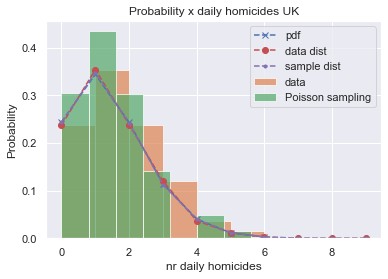

In [119]:
counts,bins = np.histogram(data,bins=range(0,11))
sample_counts,sample_bins=np.histogram(samples,bins=range(0,11))
print (sample_counts)
norm_sample_counts = sample_counts / sample_counts.sum()

x = range(7)
y = sps.poisson.pmf(x,data_mean)
plt.title('Probability x daily homicides UK')
plt.plot(x,y,'x--',label='pdf')
plt.hist(data,bins=6,density=True,alpha=0.7,label='data')
plt.hist(samples,bins=10,density=True,alpha=0.7,label='Poisson sampling')
print (bins,counts)
norm_counts = counts / counts.sum()
print (counts)
plt.plot(range(len(norm_counts)),norm_counts,'o--',label='data dist')
plt.plot(range(len(norm_sample_counts)),norm_sample_counts,'.--',label='sample dist')
plt.ylabel('Probability')
plt.xlabel('nr daily homicides')
plt.legend(loc='upper right')

In [120]:
scb = pd.read_csv('scb-dead_per_day.csv',sep=';',usecols=[1,2,3,4,5,6,7])
scb.index = pd.date_range('2020-01-01','2020-12-31')
#scb.drop(pd.Timestamp('2020-02-29'),inplace=True)
scb

,2015,2016,2017,2018,2019,2020,2015-2019
2020-01-01,295,245,339,275,300,254,291
2020-01-02,272,272,317,312,276,300,290
2020-01-03,281,293,310,295,271,256,290
2020-01-04,256,260,305,285,282,272,278
2020-01-05,268,260,304,291,275,265,280
...,...,...,...,...,...,...,...
2020-12-27,227,249,271,240,238,0,245
2020-12-28,274,262,273,261,215,0,257
2020-12-29,292,274,276,263,244,0,270
2020-12-30,283,307,275,232,226,0,265


In [121]:
scb.loc[:,:'2019'].sum()

2015    89947
2016    89019
2017    89742
2018    89672
2019    86150
dtype: int64

In [122]:
last_data_day = scb.loc[scb['2020'] == 0]
last_data_day = last_data_day.iloc[0].name
last_data_day = last_data_day - pd.DateOffset(days=1)
last_data_day

Timestamp('2020-06-26 00:00:00')

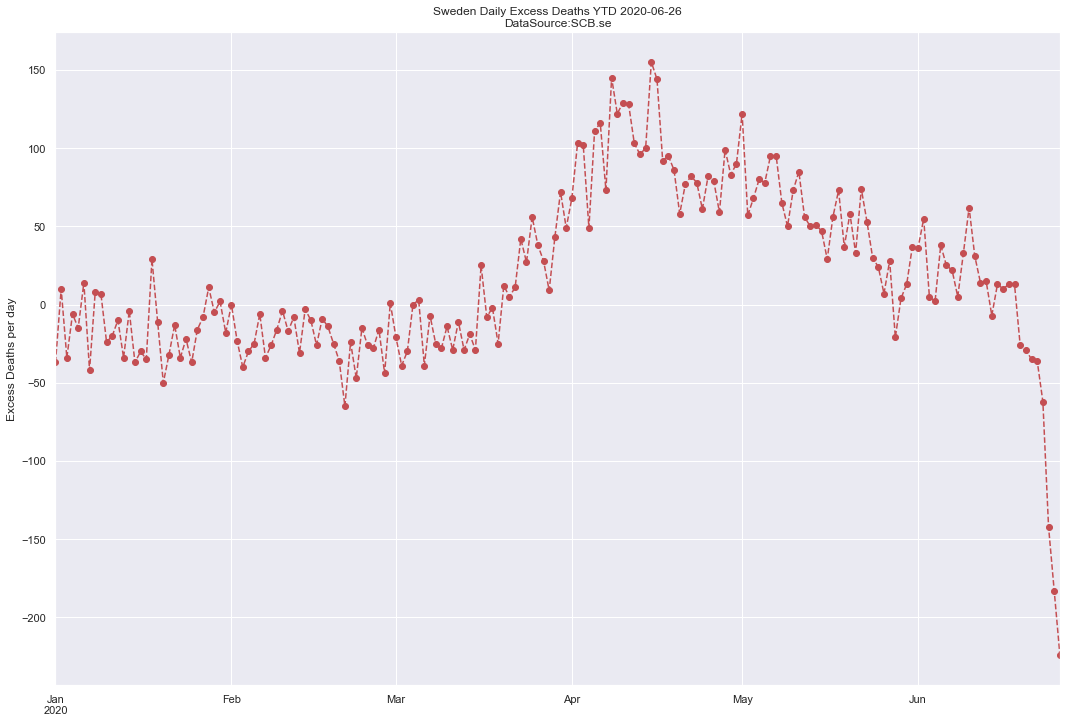

In [182]:
day_excess = scb['2020'][:last_data_day] - scb['2015-2019'][:last_data_day]
idx = day_excess.index.date
day_excess.plot(x=idx,figsize=(18,12),style='ro--',
               title='Sweden Daily Excess Deaths YTD {}\nDataSource:SCB.se'.format(last_data_day.date()))
plt.ylabel('Excess Deaths per day')

plt.savefig('scb_excess_deaths_per_day.jpg',format='jpg')

In [123]:
cumulative_until_last_day = scb[:last_data_day].sum()
cumulative_until_last_day['2020'] / cumulative_until_last_day['2015-2019']

1.0673791821561338

In [124]:
scb_weekly = scb.resample('W-TUE').sum()
print(scb_weekly.loc[:last_data_day].sum())
(scb_weekly.loc[:last_data_day,'2020'] - scb_weekly.loc[:last_data_day,'2015-2019']).sum()

2015         45588
2016         43599
2017         45068
2018         45204
2019         42136
2020         48111
2015-2019    44517
dtype: int64


3594

In [125]:
scb_weekly

,2015,2016,2017,2018,2019,2020,2015-2019
2020-01-07,1937,1846,2192,1998,1965,1879,1989
2020-01-14,1954,1904,2109,1941,1802,1866,1943
2020-01-21,1937,1969,2088,1945,1832,1789,1955
2020-01-28,1929,1977,1922,1928,1807,1794,1913
2020-02-04,1966,1931,1913,1854,1871,1794,1908
2020-02-11,1918,1913,1833,1983,1847,1771,1899
2020-02-18,2050,1783,2004,2024,1754,1822,1923
2020-02-25,2149,1874,2071,2116,1850,1774,2012
2020-03-03,1743,1806,1751,1877,1494,1751,1928
2020-03-10,2028,1897,1873,2221,1690,1831,1941


In [126]:
scb_monthly = scb.resample('M').sum()
scb_monthly['delta'] = scb['2020'] - scb['2015-2019']
scb_monthly['cumdelta'] = (scb['2020'] - scb['2015-2019']).cumsum()
# last of feb not correct for delta - leap year
scb_monthly

,2015,2016,2017,2018,2019,2020,2015-2019,delta,cumdelta
2020-01-31,8637,8548,9101,8578,8174,8118,8611,-18,-493
2020-02-29,8067,7672,7875,8151,7294,7360,8007,1,-1140
2020-03-31,8619,8009,8076,9210,7570,8361,8296,49,-1075
2020-04-30,7694,7406,7566,7615,7186,10359,7494,90,1790
2020-05-31,7311,6991,7332,6778,6972,8682,7075,37,3397
2020-06-30,6767,6542,6655,6499,6452,5357,6584,-222,2170
2020-07-31,7036,7084,6778,7259,6723,0,6973,-231,-4803
2020-08-31,6712,7005,6824,6791,6829,0,6831,-227,-11634
2020-09-30,6916,6728,6762,6803,6674,0,6776,-226,-18410
2020-10-31,7147,7357,7415,7276,7338,0,7309,-249,-25719


In [127]:
data = scb_weekly.iloc[:,0:5]
#data = data.iloc[:9]
data.mean(axis=1)
data

,2015,2016,2017,2018,2019
2020-01-07,1937,1846,2192,1998,1965
2020-01-14,1954,1904,2109,1941,1802
2020-01-21,1937,1969,2088,1945,1832
2020-01-28,1929,1977,1922,1928,1807
2020-02-04,1966,1931,1913,1854,1871
2020-02-11,1918,1913,1833,1983,1847
2020-02-18,2050,1783,2004,2024,1754
2020-02-25,2149,1874,2071,2116,1850
2020-03-03,1743,1806,1751,1877,1494
2020-03-10,2028,1897,1873,2221,1690


In [128]:
data_min = data.min(axis=1)
data_max = data.max(axis=1)

print (data.mean().mean())

1677.4716981132074


[4.37580782e-02 4.80361340e+02 1.15958344e+03 2.33219493e+03
 1.94316526e+04]


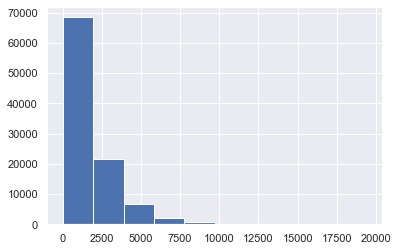

In [129]:
test_lambda = pm.rexponential(1/ data.mean().mean(),100000)
plt.hist(test_lambda)
print (np.percentile(test_lambda,[0,25,50,75,100]))

In [130]:
walk = 50000
burnin = 20000
thin = 2


res_array = np.zeros((len(data),3))
dist_array = np.zeros((len(data),(walk - burnin) // thin))

for i in range(len(data)):
    print ('\n++++++++++++++++++++ processing day ++++++++++++++++++++', i)
    print (data.iloc[i,:])
    print (data.iloc[i,:].mean())
    
    lambda_ = pm.Exponential('lambda',1/ data.iloc[i,:].mean())
    lkh  = pm.Poisson('lkh',lambda_,observed=True,value=data.iloc[i,:])
    model = pm.Model([lambda_,lkh])
    mcmc = pm.MCMC(model)
    sample = mcmc.sample(walk,burnin,thin)
    post = mcmc.trace(lambda_)[:]   
        
    res_array[i,0] = post.min()
    res_array[i,1] = post.mean()
    res_array[i,2] = post.max()
    
    dist_array[i,:] = post
                     
    


++++++++++++++++++++ processing day ++++++++++++++++++++ 0
2015    1937
2016    1846
2017    2192
2018    1998
2019    1965
Name: 2020-01-07 00:00:00, dtype: int64
1987.6
 [-----------------100%-----------------] 50000 of 50000 complete in 2.0 sec
++++++++++++++++++++ processing day ++++++++++++++++++++ 1
2015    1954
2016    1904
2017    2109
2018    1941
2019    1802
Name: 2020-01-14 00:00:00, dtype: int64
1942.0
 [-----------------100%-----------------] 50000 of 50000 complete in 2.4 sec
++++++++++++++++++++ processing day ++++++++++++++++++++ 2
2015    1937
2016    1969
2017    2088
2018    1945
2019    1832
Name: 2020-01-21 00:00:00, dtype: int64
1954.2
 [-----------------100%-----------------] 50000 of 50000 complete in 2.5 sec
++++++++++++++++++++ processing day ++++++++++++++++++++ 3
2015    1929
2016    1977
2017    1922
2018    1928
2019    1807
Name: 2020-01-28 00:00:00, dtype: int64
1912.6
 [-----------------100%-----------------] 50000 of 50000 complete in 2.6 sec
+++++++

 [-----------------100%-----------------] 50000 of 50000 complete in 2.3 sec
++++++++++++++++++++ processing day ++++++++++++++++++++ 33
2015    1574
2016    1555
2017    1591
2018    1486
2019    1542
Name: 2020-08-25 00:00:00, dtype: int64
1549.6
 [-----------------100%-----------------] 50000 of 50000 complete in 2.4 sec
++++++++++++++++++++ processing day ++++++++++++++++++++ 34
2015    1477
2016    1628
2017    1518
2018    1570
2019    1642
Name: 2020-09-01 00:00:00, dtype: int64
1567.0
 [-----------------100%-----------------] 50000 of 50000 complete in 2.4 sec
++++++++++++++++++++ processing day ++++++++++++++++++++ 35
2015    1628
2016    1650
2017    1584
2018    1632
2019    1441
Name: 2020-09-08 00:00:00, dtype: int64
1587.0
 [-----------------100%-----------------] 50000 of 50000 complete in 2.5 sec
++++++++++++++++++++ processing day ++++++++++++++++++++ 36
2015    1565
2016    1507
2017    1601
2018    1518
2019    1559
Name: 2020-09-15 00:00:00, dtype: int64
1550.0
 [--

In [131]:
dist_array

array([[1973.97641971, 1998.82778717, 1998.82778717, ..., 1987.13673302,
        1987.13673302, 1987.13673302],
       [1950.33547664, 1950.33547664, 1959.18694594, ..., 1969.12615189,
        1986.08107858, 1986.08107858],
       [1951.67049912, 1951.67049912, 1948.99677476, ..., 1938.81301344,
        1938.81301344, 1938.81301344],
       ...,
       [1772.16694561, 1772.16694561, 1772.16694561, ..., 1777.67286958,
        1766.16770244, 1766.16770244],
       [1832.80300759, 1836.42294901, 1836.42294901, ..., 1809.25758354,
        1827.28827509, 1827.28827509],
       [ 532.1668666 ,  532.1668666 ,  532.1668666 , ...,  541.1453916 ,
         541.1453916 ,  531.77001659]])

In [132]:
N = 1000

lambdas_per_week = np.zeros((len(dist_array),N))
samples_per_week = np.zeros((len(dist_array),N))

for week in range(len(dist_array)):
    lambdas_per_week[week] = np.random.choice(dist_array[week],replace=True,size=N)
    samples_per_week[week] = pm.rpoisson(lambdas_per_week[week],size=N)

In [133]:
print (lambdas_per_week[:5])
samples_per_week[:5]

[[2005.65143503 2003.05006352 1974.12550166 ... 1984.11210712
  1988.25748063 1984.47002311]
 [1939.49326583 1954.56462098 1930.41003777 ... 1934.57762227
  1944.94537729 1927.06815495]
 [1994.09192267 1966.8369514  1966.92323396 ... 1935.96068197
  1963.25112341 1892.18657114]
 [1948.95930023 1901.86806805 1882.42657291 ... 1912.91661177
  1913.72951696 1928.92644482]
 [1925.06691494 1903.10033747 1915.72518811 ... 1907.35073133
  1937.18960012 1915.06954622]]


array([[1948., 2006., 1967., ..., 2027., 1995., 1945.],
       [1961., 2033., 1854., ..., 1961., 1980., 1939.],
       [2007., 1888., 1937., ..., 1938., 2027., 1864.],
       [1936., 1992., 1925., ..., 1903., 1833., 1925.],
       [1951., 1997., 1963., ..., 1815., 1869., 1855.]])

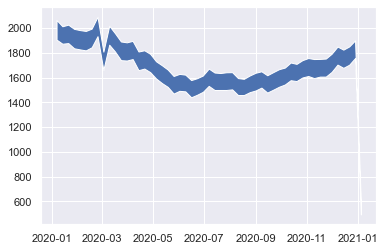

In [134]:
ci_samples = np.percentile(samples_per_week,[5.5,94.5],axis=1)
ci_samples

plt.fill_between(scb_weekly.index,ci_samples[0],ci_samples[1])

In [135]:
res_array

array([[1909.00556526, 1987.11227186, 2065.77674057],
       [1866.62049873, 1942.23906505, 2019.0336528 ],
       [1886.85491235, 1954.13018823, 2037.96141278],
       [1825.16044847, 1912.41730535, 1982.93789499],
       [1830.97839201, 1907.06321142, 1999.18745895],
       [1820.3547266 , 1898.68984858, 1979.9688821 ],
       [1846.06941838, 1923.21787829, 2003.85378682],
       [1935.32926158, 2012.02898014, 2086.18879374],
       [1663.66061507, 1734.29681724, 1805.66856177],
       [1869.78611035, 1942.08710007, 2017.37449905],
       [1805.98239592, 1881.38923538, 1956.94763397],
       [1746.40990813, 1813.0656259 , 1894.75863804],
       [1747.67763703, 1809.66781772, 1897.55705748],
       [1757.15149723, 1822.16742449, 1896.16467254],
       [1659.49566198, 1737.06150642, 1809.05675121],
       [1675.3148353 , 1747.20132711, 1818.43027646],
       [1644.54638619, 1717.91179937, 1789.64908227],
       [1599.63169633, 1661.64755936, 1730.74115222],
       [1560.12265204, 1628.

In [136]:
errors_low = np.abs(res_array[:,1] - res_array[:,0])
errors_low = errors_low[:-1]
errors_high = np.abs(res_array[:,1] - res_array[:,2]) 
errors_high = errors_high[:-1]
print (errors_low)
print (errors_high)

errors = np.array((errors_low,errors_high))
errors

[78.1067066  75.61856631 67.27527588 87.25685688 76.08481942 78.33512198
 77.14845991 76.69971856 70.63620217 72.30098973 75.40683945 66.65571776
 61.99018069 65.01592726 77.56584444 71.88649181 73.36541318 62.01586303
 68.59193717 74.47761722 61.02122842 63.47684414 65.31283751 64.7621679
 68.84959051 65.49471638 64.54605788 69.82187863 66.38058561 61.69636063
 74.91614426 59.79181341 64.51033701 71.80257216 73.86847959 68.25790813
 66.42530834 67.05417177 67.79846631 64.08077735 79.06971684 68.59564618
 72.23109324 65.1357594  67.06330689 77.69235944 74.03387724 72.66586335
 71.23174012 84.69628338 82.50429748 72.28390606]
[78.66446871 76.79458775 83.83122456 70.52058964 92.12424752 81.27903352
 80.63590852 74.1598136  71.37174452 75.28739898 75.5583986  81.69301215
 87.88923976 73.99724805 71.99524479 71.22894935 71.7372829  69.09359286
 84.54648338 76.64789276 84.51312506 68.00818048 67.68548947 63.07474785
 65.55002882 65.93310071 68.99362537 66.71556835 69.31506388 71.62885785
 7

array([[78.1067066 , 75.61856631, 67.27527588, 87.25685688, 76.08481942,
        78.33512198, 77.14845991, 76.69971856, 70.63620217, 72.30098973,
        75.40683945, 66.65571776, 61.99018069, 65.01592726, 77.56584444,
        71.88649181, 73.36541318, 62.01586303, 68.59193717, 74.47761722,
        61.02122842, 63.47684414, 65.31283751, 64.7621679 , 68.84959051,
        65.49471638, 64.54605788, 69.82187863, 66.38058561, 61.69636063,
        74.91614426, 59.79181341, 64.51033701, 71.80257216, 73.86847959,
        68.25790813, 66.42530834, 67.05417177, 67.79846631, 64.08077735,
        79.06971684, 68.59564618, 72.23109324, 65.1357594 , 67.06330689,
        77.69235944, 74.03387724, 72.66586335, 71.23174012, 84.69628338,
        82.50429748, 72.28390606],
       [78.66446871, 76.79458775, 83.83122456, 70.52058964, 92.12424752,
        81.27903352, 80.63590852, 74.1598136 , 71.37174452, 75.28739898,
        75.5583986 , 81.69301215, 87.88923976, 73.99724805, 71.99524479,
        71.22894

2020-01-07   -110
2020-01-14    -77
2020-01-21   -166
2020-01-28   -119
2020-02-04   -114
2020-02-11   -128
2020-02-18   -101
2020-02-25   -238
2020-03-03   -177
2020-03-10   -110
2020-03-17   -100
2020-03-24     70
2020-03-31    295
2020-04-07    622
2020-04-14    823
2020-04-21    707
2020-04-28    540
2020-05-05    578
2020-05-12    519
2020-05-19    343
2020-05-26    279
2020-06-02    152
2020-06-09    130
2020-06-16    138
2020-06-23   -162
Freq: W-TUE, dtype: int64
2020-01-07    -110
2020-01-14    -187
2020-01-21    -353
2020-01-28    -472
2020-02-04    -586
2020-02-11    -714
2020-02-18    -815
2020-02-25   -1053
2020-03-03   -1230
2020-03-10   -1340
2020-03-17   -1440
2020-03-24   -1370
2020-03-31   -1075
2020-04-07    -453
2020-04-14     370
2020-04-21    1077
2020-04-28    1617
2020-05-05    2195
2020-05-12    2714
2020-05-19    3057
2020-05-26    3336
2020-06-02    3488
2020-06-09    3618
2020-06-16    3756
2020-06-23    3594
Freq: W-TUE, dtype: int64


Text(0, 0.5, 'Number of Excess Deaths')

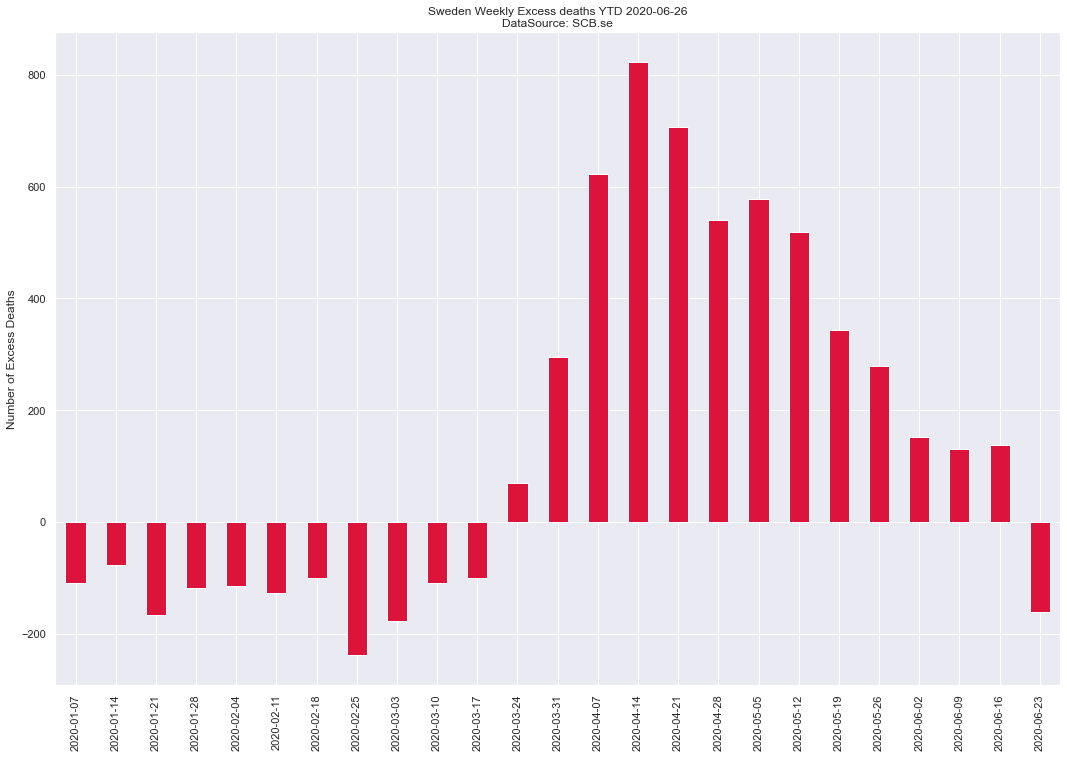

In [170]:

excess = scb_weekly.loc[:last_data_day,'2020'] - scb_weekly.loc[:last_data_day,'2015-2019']
print (excess)
current_excess = excess.cumsum()
print (current_excess)
excess.index = excess.index.date
excess.plot.bar(x=excess.index,title='Sweden Weekly Excess deaths YTD {}\nDataSource: SCB.se'.format(last_data_day.date()),
                y=excess,
                figsize=(18,12),
                color='crimson')

plt.ylabel('Number of Excess Deaths')

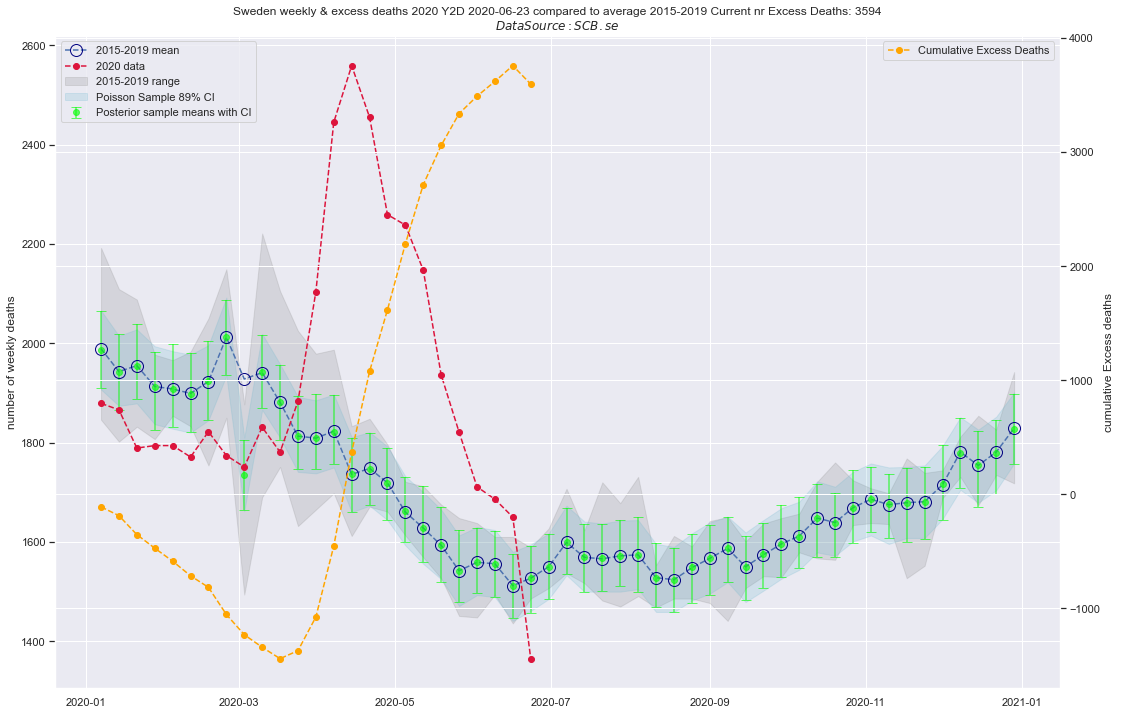

In [138]:
plt.figure(figsize=(18,12))
plt.title('Sweden weekly & excess deaths 2020 Y2D '\
          '{} compared to average 2015-2019 Current nr Excess Deaths: {}\n$Data Source: SCB.se$'.format(excess.index[-1].date(),current_excess[-1]))
ax = plt.gca()
ax2 = plt.twinx()

ax.errorbar(scb_weekly.index[:len(data) - 1],res_array[:-1,1],yerr=errors,
             fmt='o',capsize=5,color='lime',alpha=0.6,label='Posterior sample means with CI')

ax.plot(scb_weekly.index[:len(data) -1],scb_weekly['2015-2019'][:-1],'o--',
        markerfacecolor='none',markeredgecolor='navy',markersize=12,
        label='2015-2019 mean')

ax.plot(scb_weekly[:last_data_day].index,scb_weekly.loc[:last_data_day,'2020'],'o--',
         color='crimson',label='2020 data')

ax.fill_between(scb_weekly.index[:len(data) -1],y1=data_min[:-1],y2=data_max[:-1],color='grey',
                 alpha=0.2,label='2015-2019 range')

ax.fill_between(scb_weekly.index[:len(data) -1],y1=ci_samples[0][:-1],y2=ci_samples[1][:-1],color='c',
                 alpha=0.2,label='Poisson Sample 89% CI')



ax2.plot(excess.index,excess.cumsum(),'o--',ls='dashed',color='orange',label='Cumulative Excess Deaths')
ax.set_ylabel('number of weekly deaths')
ax2.set_ylabel('cumulative Excess deaths')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.savefig('scb_poisson_weekly.jpg',format='jpg')

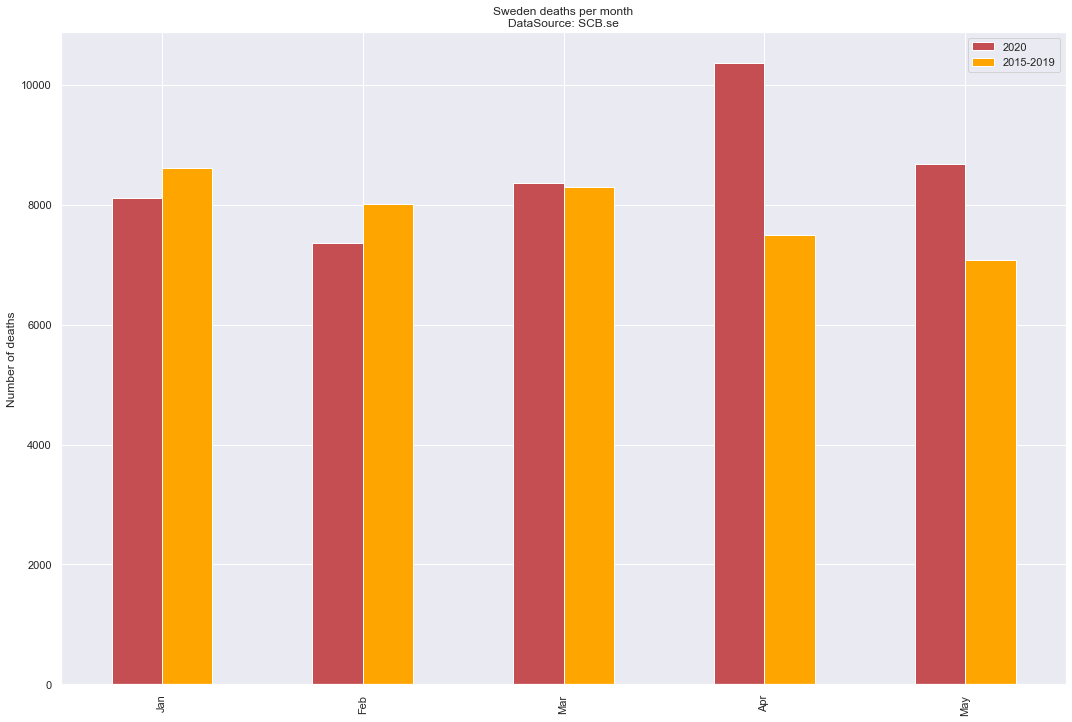

In [139]:
#scb_monthly.index = scb_monthly.index.date
scb_monthly[['2020','2015-2019']][:pd.Timestamp('2020-05-31')].plot.bar(color=['r','orange'],
                                                                        title='Sweden deaths per month\nDataSource: SCB.se',figsize=(18,12))
plt.ylabel('Number of deaths')
plt.xticks(range(len(scb_monthly[:pd.Timestamp('2020-05-31')])),['Jan','Feb','Mar','Apr','May'])
plt.savefig('scb_monthly_deaths.jpg',format='jpg')